In [1]:
# Portfolio Planner

In [2]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
%matplotlib inline

In [3]:
# Set the random seed for resutls reproducibility (for testing purposes only)
np.random.seed(42)

In [4]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

Python-dotenv could not parse statement starting at line 7
Python-dotenv could not parse statement starting at line 8
Python-dotenv could not parse statement starting at line 9


True

In [5]:
# Set Alpaca API key and secret
alpaca_api_key="PKDQDMUMBV91O87PT75Q"
alpaca_secret_key="UAOTQhnhjxWVngZQiPCd4zP0l9K8nNiOQj5N2ydK"
# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

# Data Collection
#In this step, you will need to use the Alpaca api to fetch closing prices for the `SPY` and `AGG` tickers.
#Save the results as a pandas DataFrame

In [8]:
# Subset your tickers, then pull returns data:
# Set the ticker
ticker = ["SPY", "AGG"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp('2019-07-20', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-07-19', tz='America/New_York').isoformat()

# Get 1 year's worth of historical data for SPY and AGG
df = api.get_barset(
    ticker,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df

# Drop unnecessary columns
df = df.drop(
    columns=['open', 'high', 'low', 'volume'],
    level=1
)

In [9]:
# Display sample data
df.head()

,AGG,SPY
,close,close
2019-07-22 00:00:00-04:00,111.3100,297.9200
2019-07-23 00:00:00-04:00,111.2000,299.9800
2019-07-24 00:00:00-04:00,111.3600,301.3800
2019-07-25 00:00:00-04:00,111.2000,299.9595
2019-07-26 00:00:00-04:00,111.2295,301.9900


In [10]:
## Monte Carlo Simulation

#In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

#Complete the following steps:

#1. Calculate the daily returns for the SPY and AGG closing prices.

#2. Calculate volatility for both the SPY and AGG closing prices.

#3. Find the last day's closing price for both stocks and save those as variables

#4. Run a Monte Carlo Simulation of at least `100` iterations and generate at least `30` years of closing prices

#**Hint:** There are `252` trading days per year, so the number of records to generate for each Monte Carlo run will be `252 days * 30 years`.

In [11]:
# Calculate the daily roi for the stocks
daily_returns = df.pct_change().dropna()


# Display sample data

daily_returns.head()

,AGG,SPY
,close,close
2019-07-23 00:00:00-04:00,-0.000988,0.006915
2019-07-24 00:00:00-04:00,0.001439,0.004667
2019-07-25 00:00:00-04:00,-0.001437,-0.004713
2019-07-26 00:00:00-04:00,0.000265,0.006769
2019-07-29 00:00:00-04:00,0.000094,-0.001689


In [12]:
#Calculate daily volatility for both the SPY and AGG closing prices.
daily_volatility = daily_returns.std()
spy_volatility = daily_volatility['SPY']['close']
agg_volatility = daily_volatility['AGG']['close']

In [13]:
#Find the last day's closing price for both stocks and save those as variables
spy_last_price = df['SPY']['close'][-1]
agg_last_price = df['AGG']['close'][-1]

In [14]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_records = 252 * 30
monte_carlo = pd.DataFrame()

In [15]:
# Set number of simulations and trading days
num_simulations = 500
num_records = 252 * 30

# Set last closing prices of `TSLA` and `SPHD`
agg_last_price = df['AGG']['close'][-1]
spy_last_price = df['SPY']['close'][-1]

# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_price_df = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()
 
# Run the Monte Carlo simulation 
for n in range(num_simulations):
    
    print(f"Running Simulations {n}...")
    
    # Initialize the simulated prices list with the last closing price of `SPY` and `AGG`
    spy_prices = [spy_last_price]
    agg_prices = [agg_last_price]
    
    # Simulate the returns for 20 years
    for _ in range(number_records):
        spy_prices.append(
            spy_prices[-1] * (1 + np.random.normal(daily_returns.mean()["SPY"]["close"], spy_volatility)))
        agg_prices.append(
            agg_prices[-1] * (1 + np.random.normal(daily_returns.mean()["AGG"]["close"], agg_volatility)))
            
        
    # Create a DataFrame of the simulated 
    portfolio = pd.DataFrame({
        "SPY Simulated Prices": spy_prices,
        "AGG Simulated Prices": agg_prices
 })


    # Calculate the portfolio daily returns 
    portfolio_returns = portfolio.pct_change()
    
    # Set the portfolio weights (40% AGG; 60% SPY)
    stocks_weight = 0.60 
    bonds_weight = 0.40
        
    # Calculate the weighted portfolio return:
    portfolio_returns = stocks_weight * portfolio_returns['SPY Simulated Prices'] + bonds_weight * portfolio_returns['AGG Simulated Prices']
    
    # Calculate the normalized, cumulative return series
    monte_carlo[n] = (1 + portfolio_returns.fillna(0)).cumprod()

# Print records from the DataFrame
portfolio_cumulative_returns.head()    

Running Simulations 0...
Running Simulations 1...
Running Simulations 2...
Running Simulations 3...
Running Simulations 4...
Running Simulations 5...
Running Simulations 6...
Running Simulations 7...
Running Simulations 8...
Running Simulations 9...
Running Simulations 10...
Running Simulations 11...
Running Simulations 12...
Running Simulations 13...
Running Simulations 14...
Running Simulations 15...
Running Simulations 16...
Running Simulations 17...
Running Simulations 18...
Running Simulations 19...
Running Simulations 20...
Running Simulations 21...
Running Simulations 22...
Running Simulations 23...
Running Simulations 24...
Running Simulations 25...
Running Simulations 26...
Running Simulations 27...
Running Simulations 28...
Running Simulations 29...
Running Simulations 30...
Running Simulations 31...
Running Simulations 32...
Running Simulations 33...
Running Simulations 34...
Running Simulations 35...
Running Simulations 36...
Running Simulations 37...
Running Simulations 38

""


In [16]:
# Check that the simulation run successfully
monte_carlo.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006439,0.987658,0.981136,0.998041,1.013822,1.017374,1.024024,0.989094,1.003818,0.996778,...,1.004651,0.987630,1.018317,0.998937,0.992834,1.007190,0.988851,0.982593,1.007225,0.991910
2,1.018593,0.996919,0.978249,0.994446,1.021617,0.991888,1.007999,0.960049,1.000664,1.018245,...,1.009248,1.006047,1.025669,1.002322,0.995607,0.997778,0.986552,0.982831,1.006018,1.000899
3,1.015465,0.996068,0.986560,0.978060,1.018861,0.999118,1.017400,0.943569,0.999107,1.039340,...,1.008354,1.012395,1.037345,1.005305,0.977127,0.993481,0.995426,0.996728,1.014065,0.996774
4,1.038041,1.002812,0.976134,0.992382,1.021906,0.984807,1.013067,0.935574,1.019193,1.010598,...,1.012471,1.006600,1.032437,1.018193,0.992391,0.984550,0.979506,0.997635,1.025339,1.005146


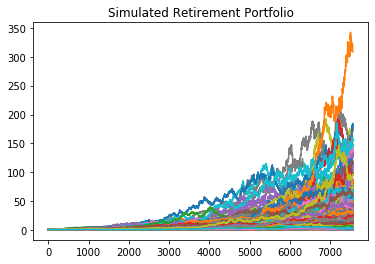

In [17]:
# Visualize the simulation 
monte_carlo.plot(
    legend=None, 
    title='Simulated Retirement Portfolio'
)

In [18]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
ending_returns = monte_carlo.iloc[-1, :]

In [19]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
ending_returns = monte_carlo.tail(1).T
ending_returns.head()

,7560
0,20.234845
1,11.980856
2,28.438052
3,32.466796
4,24.984184


In [39]:
# Display the 90% confidence interval for the ending returns
confidence_interval = ending_returns.quantile(q=[0.10, 0.90], numeric_only=True)
confidence_interval

,7560
0.1,3.484323
0.9,50.841146


<Figure size 432x288 with 0 Axes>

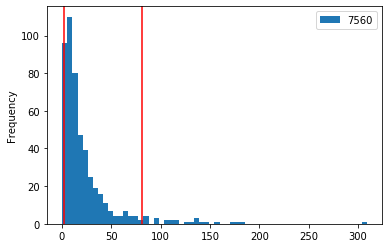

In [29]:
# Vis6alize the distribution of the ending returns
plt.figure();
ending_returns.plot.hist(bins=60)
plt.axvline(confidence_interval.iloc[0, 0], color="r")
plt.axvline(confidence_interval.iloc[1, 0], color="r")

In [22]:
# Retirement Analysis

#In this section, you will use the Monte Carlo model to answer the following retirement questions:

#What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [38]:
#Compute Cumulative Returns
ending_returns.quantile([.1, .5, .90])

,7560
0.1,3.484323
0.5,12.944099
0.9,50.841146


In [37]:
#Given an initial investment of $20 000 dollars, what is the expected return in dollars at the 10th, 50th, 
#and 90th percentiles? 

#Set the initial investment
initial_investment = 20000

# Calculate expected cumulative portfolio returns

initial_investment * ending_returns.quantile([.10, .50, .90])

,7560
0.1,6.968646e+04
0.5,2.588820e+05
0.9,1.016823e+06


In [40]:
#Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement 
#portfolio meet or exceed that value at the 10th percentile?

In [42]:
# Set Plaid's projected income
plaid_projected_annual_income =  7389

# Calculate the 4% withdrawal for the ending return as retirement income
retirement_income = .04 * (initial_investment * ending_returns.quantile(.1)).iloc[0]

# Determine if the retirement income meets or exceeds the current projected income
if retirement_income >= plaid_projected_annual_income:

    print(f"You will have ${retirement_income:.2f} in retirement income which is sufficient")
else:
    print(f"You will have ${retirement_income:.2f} in retirement income which is not sufficient")    

You will have $2787.46 in retirement income which is not sufficient


In [43]:
 How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

Object `withdrawal` not found.


In [ ]:
How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal

In [44]:
# Re-calculate the retirement income with a 50% increase in the initial investment amount
.04 * (1.5 * initial_investment * ending_returns.quantile(.1)).iloc[0] 

4181.187845833278

In [45]:
# Optional Challenge

In [46]:
# Use the Monte Carlo data and calculate the cumulative returns at the 5%, 50%, and 95% quartiles and 
# plot this data as a line chart to see how the cumulative returns change over the life of the investment.
# In this section, you need to calculate and plot the cumulative returns for the median and 90% confidence intervals.
# This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [47]:
# Compute projected returns
projected_returns = monte_carlo.quantile(q=[0.05, .5, .95], axis=1, numeric_only=True).T

# Display sample data
projected_returns.head()

,0.05,0.50,0.95
0,1.000000,1.000000,1.000000
1,0.979477,1.000684,1.022308
2,0.973086,1.001730,1.030785
3,0.966721,1.001918,1.039341
4,0.959910,1.002717,1.042251


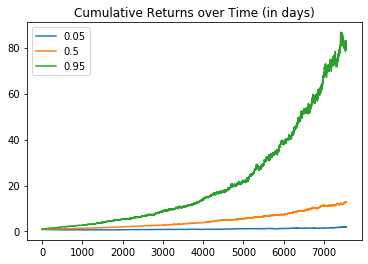

In [48]:
# Plot the cumulative returns over time
projected_returns.plot(title="Cumulative Returns over Time (in days)") 

In [49]:
# Compute portfolio performance over time
projected_performance = (initial_investment * projected_returns)

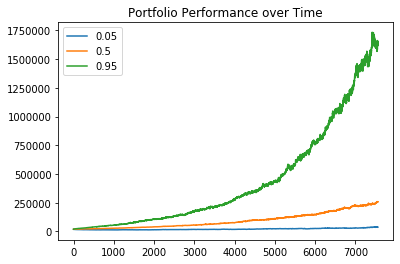

In [50]:
# Plot projected performance over time
projected_performance.plot(title="Portfolio Performance over Time") 